In [3]:
import numpy as np
import xarray as xr
import salishsea_tools.river_202108 as rivers
import matplotlib.pyplot as plt

In [8]:
region = 'Puntledge'
dep_idx = 5
start_date = '20180801'
end_date = '20190801'

In [9]:
# if (region == 'Fraser') or (region == 'Other Rivers'):
#     fw_rivers = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/extractions/SalishSeaCast_river_trace_day_avg_Fraser_surface_rivers_test_'+start_date+'_'+end_date+'.nc')
# else:
#     fw_rivers = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/extractions/SalishSeaCast_river_trace_day_avg_river_tracers_'+region+'_region_'+start_date+'_'+end_date+'.nc')

# fw_rivers = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/extractions/SalishSeaCast_river_trace_day_avg_all_quick_check_output_'+start_date+'_'+end_date+'.nc')


# fw_rivers = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/extractions/SalishSeaCast_river_trace_day_avg_Fraser_all_20170101_20181231.nc')

fw_rivers = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/extractions/SalishSeaCast_river_trace_day_avg_all_surface_rivers_'+region+'_'+start_date+'_'+end_date+'.nc')

snap_phys = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/monthly_results/01apr17/SalishSea_1d_20170401_20170401_grid_T.nc')

In [10]:
e1t_arr = np.zeros((40, 898, 398)) + 500
e1t_dshape = e1t_arr[np.newaxis, ...]
e2t_arr = np.zeros((40, 898, 398)) + 440
e2t_dshape = e2t_arr[np.newaxis, ...]
e3t_arr = snap_phys['e3t'].to_numpy()[0, :, :, :]
e3t_dshape = e3t_arr[np.newaxis, ...]

In [11]:
mult_factor = e1t_dshape * e2t_dshape * e3t_dshape

In [12]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [13]:
def river_box(w_shed, r_call, box_side):
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 898-box_side*2
        river_range[1] = 898

    if (398 - river_range[3] < 0):
        river_range[2] = 398-box_side*2
        river_range[3] = 398

    return river_range

In [14]:
box_size = 20
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
Skagit = river_box('skagit', 'Skagit1', box_size)
Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
Elwha = river_box('jdf', 'Elwha', box_size)
Cowichan = river_box('evi_s', 'Cowichan1', box_size)
Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
Puntledge = river_box('evi_s', 'Puntledge', box_size)
Salmon = river_box('evi_n', 'SalmonSayward', box_size)
Homathko = river_box('bute', 'Homathko', box_size)
Squamish = river_box('howe', 'Squamish', box_size)

In [15]:
Puntledge

[634, 674, 100, 140]

In [16]:
def make_ts_arr(jdepth, data):
    river_arr = data[:, 0:jdepth].sum(axis=3).sum(axis=2).sum(axis=1)
    return river_arr.to_numpy()

In [17]:
time = fw_rivers['time'].to_numpy()

In [18]:
Nooksack_arr = make_ts_arr(dep_idx, fw_rivers.nooksack_river)
Skagit_arr = make_ts_arr(dep_idx, fw_rivers.skagit_river)
Snohomish_arr = make_ts_arr(dep_idx, fw_rivers.snohomish_river)
Nisqually_arr = make_ts_arr(dep_idx, fw_rivers.nisqually_river)
Elwha_arr = make_ts_arr(dep_idx, fw_rivers.elwha_river)
Cowichan_arr = make_ts_arr(dep_idx, fw_rivers.cowichan_river)
Nanaimo_arr = make_ts_arr(dep_idx, fw_rivers.nanaimo_river)
Puntledge_arr = make_ts_arr(dep_idx, fw_rivers.puntledge_river)
Salmon_arr = make_ts_arr(dep_idx, fw_rivers.salmon_river)
Homathko_arr = make_ts_arr(dep_idx, fw_rivers.homathko_river)
Squamish_arr = make_ts_arr(dep_idx, fw_rivers.squamish_river)

Fraser_arr = make_ts_arr(dep_idx, fw_rivers.fraser_river)
Other_arr = make_ts_arr(dep_idx, fw_rivers.other_rivers)

In [19]:
Total_arr = Nooksack_arr + Skagit_arr + Snohomish_arr + Nisqually_arr + Elwha_arr + Cowichan_arr + Nanaimo_arr + Puntledge_arr + Salmon_arr + Homathko_arr + Squamish_arr + Fraser_arr + Other_arr

In [20]:
colors_list = ['#8b4513', '#008000', '#4682b4', '#4b0082', '#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', '#918504', '#ff1493']

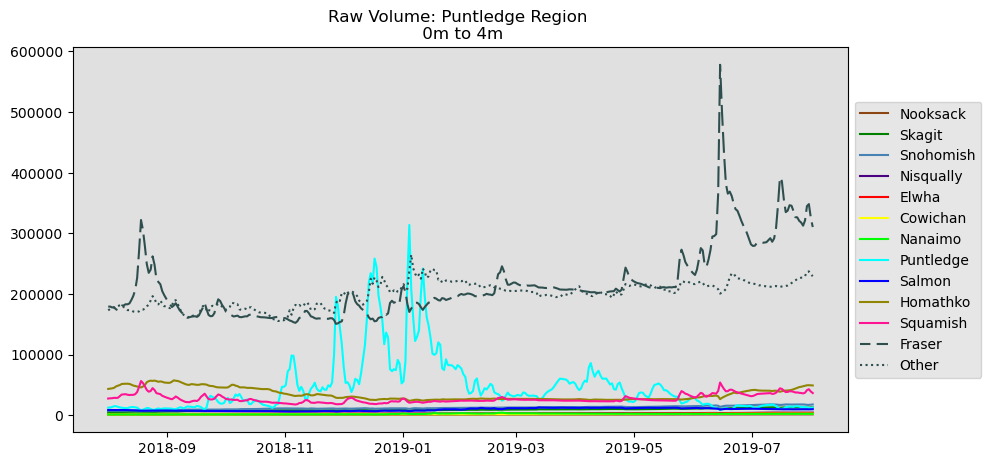

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(time, Nooksack_arr, label='Nooksack', color=colors_list[0])
ax.plot(time, Skagit_arr, label='Skagit', color=colors_list[1])
ax.plot(time, Snohomish_arr, label='Snohomish', color=colors_list[2])
ax.plot(time, Nisqually_arr, label='Nisqually', color=colors_list[3])
ax.plot(time, Elwha_arr, label='Elwha', color=colors_list[4])
ax.plot(time, Cowichan_arr, label='Cowichan', color=colors_list[5])
ax.plot(time, Nanaimo_arr, label='Nanaimo', color=colors_list[6])
ax.plot(time, Puntledge_arr, label='Puntledge', color=colors_list[7])
ax.plot(time, Salmon_arr, label='Salmon', color=colors_list[8])
ax.plot(time, Homathko_arr, label='Homathko', color=colors_list[9])
ax.plot(time, Squamish_arr, label='Squamish', color=colors_list[10])
ax.plot(time, Fraser_arr, label='Fraser', linestyle=(5, (10, 3)), color='#2f4f4f')
ax.plot(time, Other_arr, label='Other', linestyle='dotted', color='#2f4f4f')
ax.set_facecolor('#e0e0e0')

ax.set_title('Raw Volume: {} Region \n 0m to {}m'.format(region, int(float(fw_rivers['depth'][dep_idx-1].values))))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='#e0e0e0')

plt.savefig('timeseries_plots/'+region+'_volume_0_{}m_{}_{}.png'.format(int(float(fw_rivers['depth'][dep_idx-1].values)), start_date, end_date))

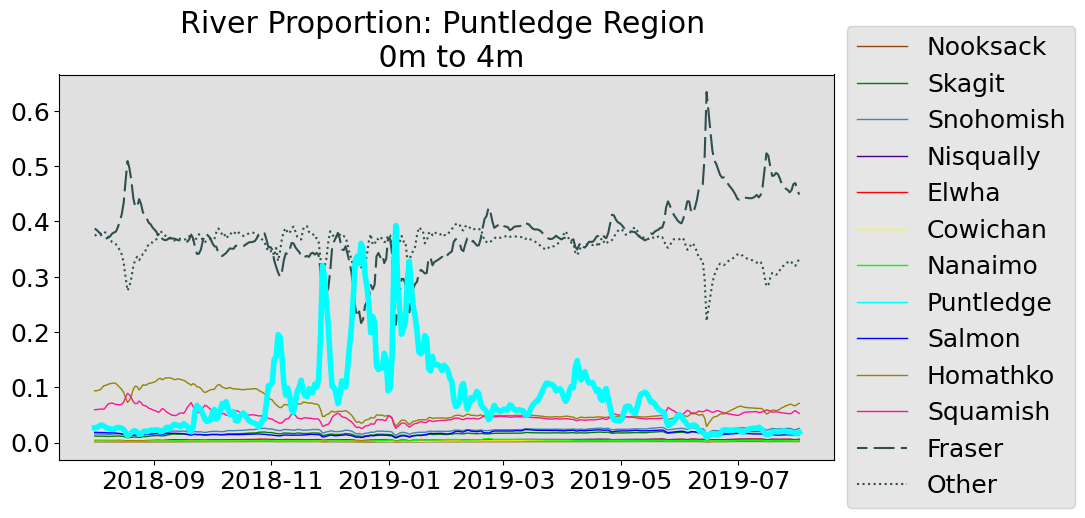

In [23]:
plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(time, Nooksack_arr/Total_arr, label='Nooksack', color=colors_list[0], linewidth=1.0)
ax.plot(time, Skagit_arr/Total_arr, label='Skagit', color=colors_list[1], linewidth=1.0)
ax.plot(time, Snohomish_arr/Total_arr, label='Snohomish', color=colors_list[2], linewidth=1.0)
ax.plot(time, Nisqually_arr/Total_arr, label='Nisqually', color=colors_list[3], linewidth=1.0)
ax.plot(time, Elwha_arr/Total_arr, label='Elwha', color=colors_list[4], linewidth=1.0)
ax.plot(time, Cowichan_arr/Total_arr, label='Cowichan', color=colors_list[5], linewidth=1.0)
ax.plot(time, Nanaimo_arr/Total_arr, label='Nanaimo', color=colors_list[6], linewidth=1.0)
ax.plot(time, Puntledge_arr/Total_arr, label='Puntledge', color=colors_list[7], linewidth=1.0)
ax.plot(time, Salmon_arr/Total_arr, label='Salmon', color=colors_list[8], linewidth=1.0)
ax.plot(time, Homathko_arr/Total_arr, label='Homathko', color=colors_list[9], linewidth=1.0)
ax.plot(time, Squamish_arr/Total_arr, label='Squamish', color=colors_list[10], linewidth=1.0)
ax.plot(time, Fraser_arr/Total_arr, label='Fraser', linestyle=(5, (10, 3)), color='#2f4f4f')
ax.plot(time, Other_arr/Total_arr, label='Other', linestyle='dotted', color='#2f4f4f')
ax.plot(time, Puntledge_arr/Total_arr, color=colors_list[7], linewidth=4.0)
ax.set_facecolor('#e0e0e0')

ax.set_title('River Proportion: {} Region \n 0m to {}m'.format(region, int(float(fw_rivers['depth'][dep_idx-1].values))))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='#e0e0e0')

plt.savefig('timeseries_plots/'+region+'_proportion_0_{}m_{}_{}.png'.format(int(float(fw_rivers['depth'][dep_idx-1].values)), start_date, end_date))